In [1]:
import nltk

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df['malignant'].sum()/len(df)

0.09584448302009764

In [7]:
total=0
for i in df.columns[2:]:
    print(i,df[i].sum())
    total=total+df[i].sum()
    
print(total-15294-1595)

malignant 15294
highly_malignant 1595
rude 8449
threat 478
abuse 7877
loathe 1405
18209


In [8]:
df['length']=[len(i) for i in df['comment_text'] ]

In [9]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'length'],
      dtype='object')

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
#import dtale
#dtale.show(df)

In [12]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
length              0
dtype: int64

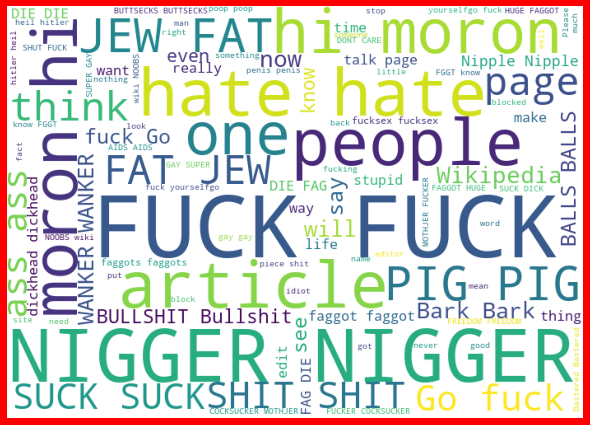

In [13]:
from wordcloud import WordCloud


spams = df['comment_text'][df['malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

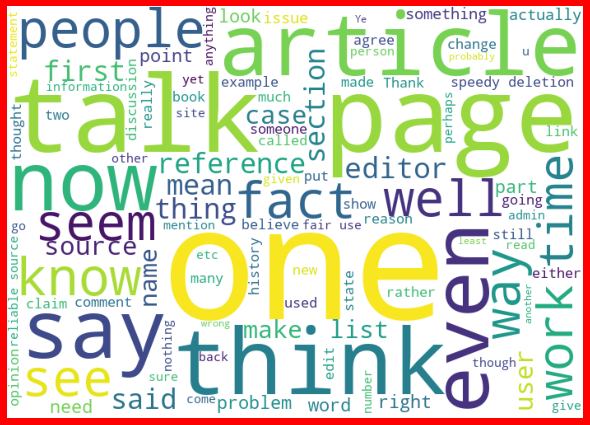

In [17]:



spams = df['comment_text'][df['malignant']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

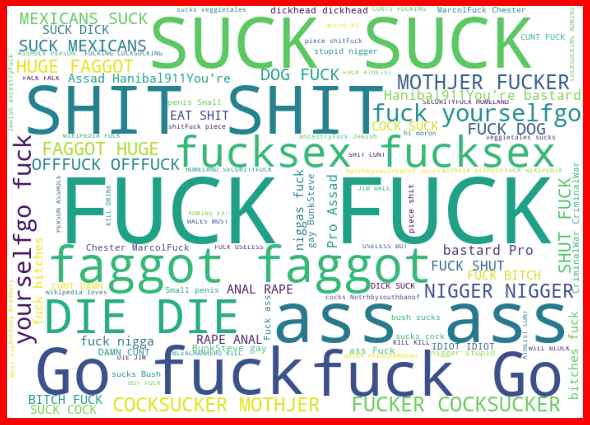

In [18]:
spams = df['comment_text'][df['highly_malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

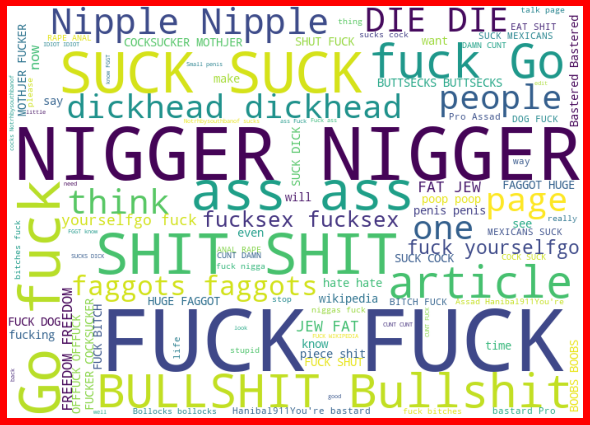

In [19]:
spams = df['comment_text'][df['rude']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

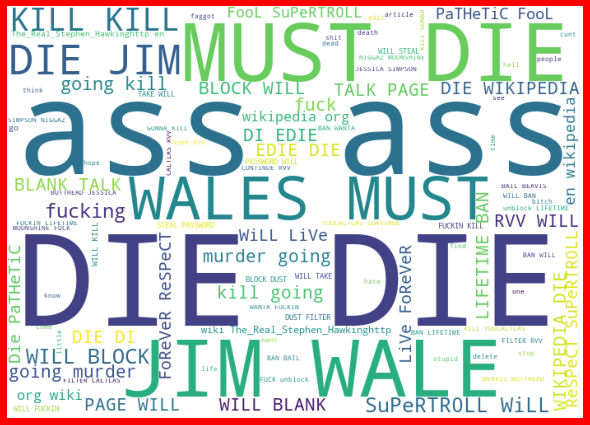

In [20]:
spams = df['comment_text'][df['threat']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

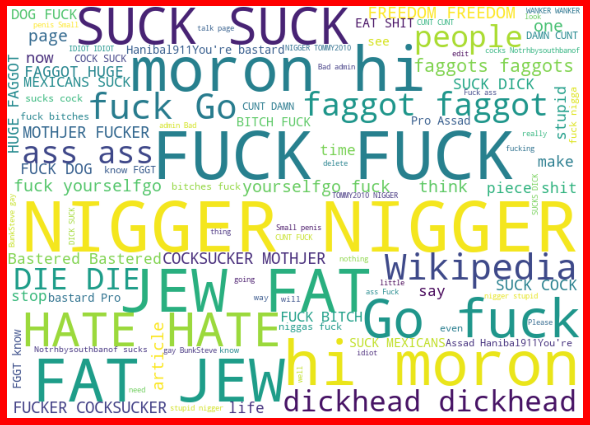

In [21]:
spams = df['comment_text'][df['abuse']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

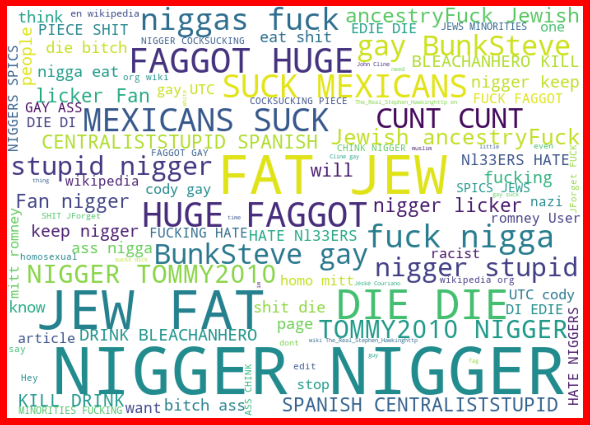

In [22]:
spams = df['comment_text'][df['loathe']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [15]:
corpus=[]
nltk.download('stopwords')
nltk.download('wordnet')
stpwds=set(stopwords.words('english'))
for i in range(len(df)):
    r=re.sub('[^a-zA-Z0-9]',' ',df['comment_text'][i])
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in stpwds ]
    r=' '.join(r)
    corpus.append(r)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
len(corpus)

159571

In [17]:
corpus[0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired 89 205 38 27'

In [18]:
r

'really think understand came idea bad right away kind community go bad idea go away instead helping rewrite'

In [19]:
r.split()

['really',
 'think',
 'understand',
 'came',
 'idea',
 'bad',
 'right',
 'away',
 'kind',
 'community',
 'go',
 'bad',
 'idea',
 'go',
 'away',
 'instead',
 'helping',
 'rewrite']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdfV=TfidfVectorizer(max_features=2000)
TfIdfV.fit(corpus)
x_m=TfIdfV.fit_transform(corpus).toarray()

In [21]:
x_m.shape

(159571, 2000)

In [22]:
y1=df['malignant']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_m,y1,test_size=0.05)

In [24]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB()
spam_detect_model.fit(X_train,y_train)
y_pred=spam_detect_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[7223   30]
 [ 363  363]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7253
           1       0.92      0.50      0.65       726

    accuracy                           0.95      7979
   macro avg       0.94      0.75      0.81      7979
weighted avg       0.95      0.95      0.94      7979

0.6487935656836461


In [25]:
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


original dataset shape: 159571
Resample dataset shape 30588


In [27]:
X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)
from sklearn.naive_bayes import MultinomialNB
spam_detect_model_u=MultinomialNB()
spam_detect_model_u.fit(X_train,y_train)
y_pred=spam_detect_model_u.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[664 103]
 [117 646]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       767
           1       0.86      0.85      0.85       763

    accuracy                           0.86      1530
   macro avg       0.86      0.86      0.86      1530
weighted avg       0.86      0.86      0.86      1530

0.8544973544973544


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[623 144]
 [136 627]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       767
           1       0.81      0.82      0.82       763

    accuracy                           0.82      1530
   macro avg       0.82      0.82      0.82      1530
weighted avg       0.82      0.82      0.82      1530

0.8174706649282919


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)

In [34]:
#rf=DecisionTreeClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[677  90]
 [133 630]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       767
           1       0.88      0.83      0.85       763

    accuracy                           0.85      1530
   macro avg       0.86      0.85      0.85      1530
weighted avg       0.86      0.85      0.85      1530

0.8496291301416049


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[699  68]
 [130 633]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       767
           1       0.90      0.83      0.86       763

    accuracy                           0.87      1530
   macro avg       0.87      0.87      0.87      1530
weighted avg       0.87      0.87      0.87      1530

0.8647540983606558


In [36]:
y1=df['highly_malignant']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))


X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)

lr_1=LogisticRegression()
lr_1.fit(X_train,y_train)
y_pred=lr_1.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


original dataset shape: 159571
Resample dataset shape 3190
[[93  1]
 [ 6 60]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        94
           1       0.98      0.91      0.94        66

    accuracy                           0.96       160
   macro avg       0.96      0.95      0.95       160
weighted avg       0.96      0.96      0.96       160

0.9448818897637795


In [38]:
y1=df['rude']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))


X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)

lr_2=LogisticRegression()
lr_2.fit(X_train,y_train)
y_pred=lr_2.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


original dataset shape: 159571
Resample dataset shape 16898
[[403  16]
 [ 62 364]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       419
           1       0.96      0.85      0.90       426

    accuracy                           0.91       845
   macro avg       0.91      0.91      0.91       845
weighted avg       0.91      0.91      0.91       845

0.903225806451613


In [37]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'length'],
      dtype='object')

In [39]:
y1=df['threat']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))


X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)

lr_3=LogisticRegression()
lr_3.fit(X_train,y_train)
y_pred=lr_3.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

original dataset shape: 159571
Resample dataset shape 956
[[26  0]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.86      0.93        22

    accuracy                           0.94        48
   macro avg       0.95      0.93      0.94        48
weighted avg       0.94      0.94      0.94        48

0.9268292682926829


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
y1=df['abuse']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))


X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)

lr_4=LogisticRegression()
lr_4.fit(X_train,y_train)
y_pred=lr_4.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


original dataset shape: 159571
Resample dataset shape 15754
[[365  21]
 [ 49 353]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       386
           1       0.94      0.88      0.91       402

    accuracy                           0.91       788
   macro avg       0.91      0.91      0.91       788
weighted avg       0.91      0.91      0.91       788

0.9097938144329898


In [41]:
y1=df['loathe']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_m, y1)

print('original dataset shape:', len(y1))
print('Resample dataset shape', len(y_rus))


X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.05)

lr_5=LogisticRegression()
lr_5.fit(X_train,y_train)
y_pred=lr_5.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


original dataset shape: 159571
Resample dataset shape 2810
[[58  3]
 [16 64]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        61
           1       0.96      0.80      0.87        80

    accuracy                           0.87       141
   macro avg       0.87      0.88      0.87       141
weighted avg       0.88      0.87      0.87       141

0.870748299319728


In [43]:
dft=pd.read_csv('test.csv')

In [44]:
dft.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [45]:
corpus=[]
#nltk.download('stopwords')
#nltk.download('wordnet')
stpwds=set(stopwords.words('english'))
for i in range(len(dft)):
    r=re.sub('[^a-zA-Z0-9]',' ',dft['comment_text'][i])
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in stpwds ]
    r=' '.join(r)
    corpus.append(r)

In [46]:
x_n=TfIdfV.transform(corpus).toarray()

In [48]:
x_n.shape

(153164, 2000)

In [ ]:
'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'

In [49]:
dft['malignant']=lr.predict(x_n)

In [52]:
dft['highly_malignant']=lr_1.predict(x_n)

In [53]:
dft['rude']=lr_2.predict(x_n)

In [54]:
dft['threat']=lr_3.predict(x_n)

In [55]:
dft['abuse']=lr_4.predict(x_n)

In [56]:
dft['loathe']=lr_5.predict(x_n)

In [57]:
dft.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",1,0,1,0,1,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0,0,0,1,0,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0,0,0,0,0,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0,0,0,0,0,0
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel...",1,0,1,0,1,0


In [58]:
dft.to_csv('test_with_predictions.csv')